In [7]:
import pandas as pd
import seaborn as sns

In [10]:
from sklearn.datasets import load_wine

In [13]:
df=load_wine()

In [15]:
df1=pd.DataFrame(data=df.data,columns=df.feature_names)

In [18]:
df1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [28]:
X=df1.drop(labels='proline',axis=1)
Y=df1.proline

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
encoder=StandardScaler()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.33)

In [44]:
from sklearn.decomposition import PCA

In [68]:
pca=PCA(n_components=3)

In [69]:
X_train=pca.fit_transform(X_train)
pca.components_

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00,  2.77555756e-17],
       [ 0.00000000e+00, -2.77555756e-17,  1.00000000e+00]])

In [70]:
X_test=pca.transform(X_test)

In [95]:
import seaborn as sns
import numpy as np

In [96]:
import matplotlib.pyplot as plt
from sklearn import decomposition

In [97]:
fig=plt.figure(1,figsize=(4,3))
plt.clf()

<Figure size 400x300 with 0 Axes>

/tmp/ipykernel_1121/2697649872.py:9: RuntimeWarning: Mean of empty slice.
  X[Y==label,0].mean(),
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_1121/2697649872.py:10: RuntimeWarning: Mean of empty slice.
  X[Y==label,1].mean()+1.5,
/tmp/ipykernel_1121/2697649872.py:11: RuntimeWarning: Mean of empty slice.
  X[Y==label,2].mean(),


ValueError: invalid entry in choice array

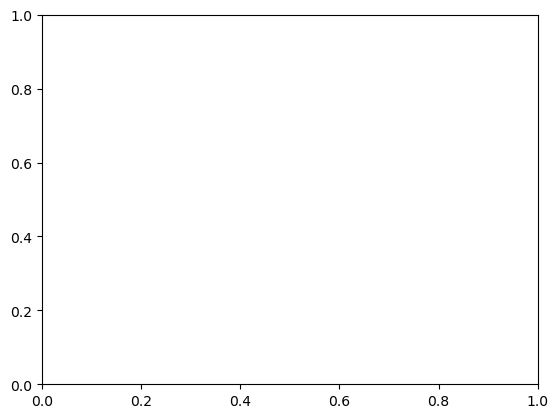

In [98]:
ax=fig.add_subplot(111,projection="3d",elev=48,azim=134)
ax.set_position([0,0,0.95,1])
plt.cla()
pca=decomposition.PCA(n_components=3)
pca.fit(X)
X=pca.transform(X)
for name,label in [("flavanoids",0),("color_intensity",1),("total_phenols",2)]:
    ax.text3D(
        X[Y==label,0].mean(),
        X[Y==label,1].mean()+1.5,
        X[Y==label,2].mean(),
        name,horizontalalignment="center",
        bbox=dict(alpha=0.5,edgecolor="w",facecolor="w")
        
    )

    y = np.choose(Y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()